## SHAP분석 불러오기

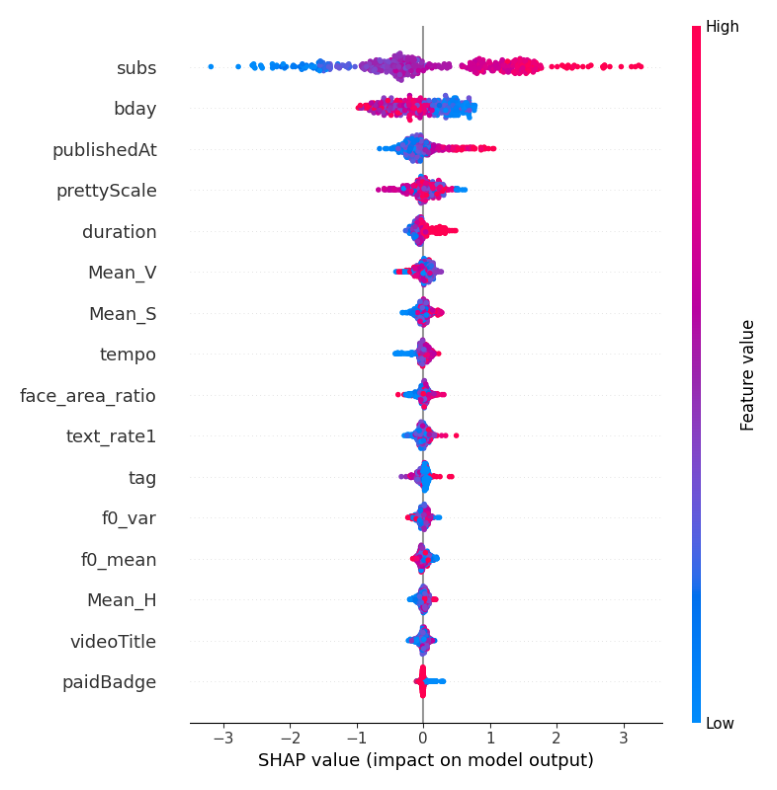

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as img

shap = img.imread("SHAP_final.png")
plt.figure(figsize = (10, 10))
plt.imshow(shap)
plt.axis(False)
plt.show()

### 변수 설명

1. (메타) subs : 구독자 수
2. (메타) bday : 채널 생성 후 데이터 수집 시점까지 지난 기간(일수)
3. (메타) publishedAt : 영상 게시 이후 데이터 수집 시점까지 지난 기간(일수)
4. (시각) prettyScale : 유튜버의 외모 점수(prettyScale 웹사이트에서 4회 측정 후 평균값 도출)
5. (메타) duration : 영상의 길이(초 단위 - 쇼츠 영상의 길이는 최대 60초)
6. (시각) Mean_V : 썸네일 이미지의 명도(HSV 중 V-Value) - 밝을수록 큰 값을 지님
7. (시각) Mean_S : 썸네일 이미지의 채도(HSV 중 S-Saturation)
8. (청각) tempo : 영상 음성 내 목소리 추출, 음성의 발화 속도 평균값
9. (시각) face_area_ratio : 썸네일 이미지 내 얼굴이 차지하는 비율(얼굴이 없는 경우 0의 값)
10. (시각) text_rate1 : 썸네일 이미지 내 텍스트가 차지하는 비율
11. (메타) tag : 태그 개수
12. (청각) f0_var : ~~~표준편차의 평균값
13. (청각) f0_mean :
14. (시각) Mean_H : 썸네일 이미지의 색조(HSV 중 H-Hue) - 0°~360°의 범위, 360°와 0°는 같은 색상 빨강을 가리킴
15. (메타) videoTitle : 영상 제목의 길이(쇼츠의 경우 쇼츠를 시청할때 하단에 함께 보이는 줄글들이 제목에 해당됨)
16. (메타) paidBadge : '유료 광고 포함'을 공식적으로 선택해서 영상을 발행한 경우 1, 제목/설명/태그 등에 유료 광고나 제품 제공을 간접적으로 표시한 경우 0의 값을 가짐


## test 데이터 불러오기

In [11]:
import pandas as pd

data = pd.read_csv("preds.csv")

In [13]:
data.columns

Index(['index', 'Mean_H', 'Mean_S', 'Mean_V', 'duration', 'paidBadge', 'bday',
       'subs', 'prettyScale', 'publishedAt', 'videoTitle', 'tag',
       'face_area_ratio', 'text_rate1', 'tempo', 'f0_mean', 'f0_var',
       'y_predict', 'y_truth', 'diff_abs'],
      dtype='object')

In [14]:
#  뒤쪽에 y_predict, y_truth, diff_abs 컬럼 앞으로 가져오기 (보기 좋게....)


columns = ['y_predict', 'y_truth', 'diff_abs'] + [col for col in data.columns if col not in ['y_predict', 'y_truth', 'diff_abs']]
data = data[columns]

data.head()

,y_predict,y_truth,diff_abs,index,Mean_H,Mean_S,Mean_V,duration,paidBadge,bday,subs,prettyScale,publishedAt,videoTitle,tag,face_area_ratio,text_rate1,tempo,f0_mean,f0_var
0,7.296048,7.229114,0.066934,1056,0.353333,0.177083,0.738462,0.763636,1,0.723039,0.498438,0.674074,0.116474,0.180851,0.00,0.067883,0.000000,0.547170,0.125366,0.075043
1,11.243348,12.034216,0.790868,109,0.060000,0.312500,0.794872,0.981818,1,0.541141,0.779173,0.622222,0.053411,0.276596,0.32,0.681944,0.063758,0.690476,0.241296,0.450482
2,9.959448,8.992806,0.966642,1867,0.340000,0.708333,0.676923,1.000000,1,0.118873,0.600843,0.540741,0.147362,0.968085,0.00,0.000000,0.107240,0.568627,0.354143,0.379677
3,11.865882,12.055389,0.189507,1817,0.206667,0.645833,0.779487,0.527273,1,0.061800,0.653933,0.000000,0.111326,0.127660,0.00,1.000000,0.035424,0.852941,0.148294,0.190686
4,7.925123,9.868016,1.942893,322,0.193333,0.635417,0.553846,0.709091,1,0.441877,0.585686,0.614815,0.017375,0.882979,0.00,0.658190,0.090759,0.644444,0.416378,0.542980


## prettyScale과 y_predict 사이의 관계

In [15]:
import seaborn as sns

In [17]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [18]:
plt.style.use('seaborn-v0_8-muted')

<Axes: xlabel='prettyScale', ylabel='y_predict'>

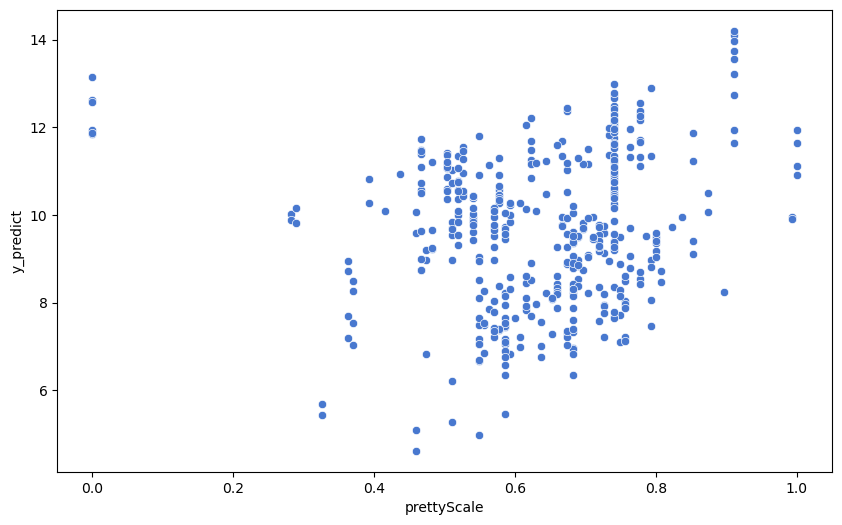

In [22]:
plt.figure(figsize = (10, 6))

sns.scatterplot(data = data,
               x = "prettyScale",
               y = "y_predict")

> X축이 프리티스케일 점수, Y축이 '예측한 조회수 값' 입니다. 샤프 분석으로는 애매했는데.. 이렇게 따로 보면... 일단 프리티 스케일 점수가 높을수록 예측값도 높은 경향이 있다고 볼수도 있을까..? 싶은 생각이 듭니다. 어거지 같긴 한데...

> 프리티스케일 값 0점에 가까운데 예측 조회수 폭발한 저 점들이.. 누구인지 찾아보겠읍니다...

In [26]:
data[data['prettyScale'] < 0.2]

,y_predict,y_truth,diff_abs,index,Mean_H,Mean_S,Mean_V,duration,paidBadge,bday,subs,prettyScale,publishedAt,videoTitle,tag,face_area_ratio,text_rate1,tempo,f0_mean,f0_var
3,11.865882,12.055389,0.189507,1817,0.206667,0.645833,0.779487,0.527273,1,0.0618,0.653933,0.0,0.111326,0.127660,0.00,1.0,0.035424,0.852941,0.148294,0.190686
13,11.946389,11.406887,0.539502,1398,0.226667,0.541667,0.835897,0.490909,1,0.0618,0.653933,0.0,0.009653,0.085106,0.00,1.0,0.063236,0.644444,0.152417,0.177874
15,11.835726,11.863096,0.027370,1705,0.166667,0.604167,0.805128,0.654545,1,0.0618,0.653933,0.0,0.039254,0.244681,0.00,1.0,0.082508,0.644444,0.177481,0.198119
141,12.614128,11.735349,0.878779,1547,0.273333,0.593750,0.692308,0.290909,1,0.0618,0.653933,0.0,0.314028,0.297872,0.56,1.0,0.083024,0.547170,0.145981,0.139757
205,12.585651,10.810919,1.774732,1222,0.266667,0.687500,0.728205,0.836364,1,0.0618,0.653933,0.0,0.213642,0.457447,0.00,1.0,0.030404,0.763158,0.180159,0.269970
423,13.136816,12.577860,0.558956,1594,0.313333,0.718750,0.723077,0.490909,1,0.0618,0.653933,0.0,0.245817,0.234043,0.00,0.0,0.063875,0.743590,0.152493,0.188780
425,11.871433,13.998168,2.126735,41,0.140000,0.750000,0.712821,0.309091,1,0.0618,0.653933,0.0,0.085586,0.244681,0.00,1.0,0.045386,0.674419,0.153078,0.161282


> 확인해 보니 얼굴 없이 광고만 올리는 유튜버라서 프리티스케일 점수를 최하점을 받게 된 유튜버입니다. (오늘의 립)

## duration과 y_predict

<Axes: xlabel='duration', ylabel='y_predict'>

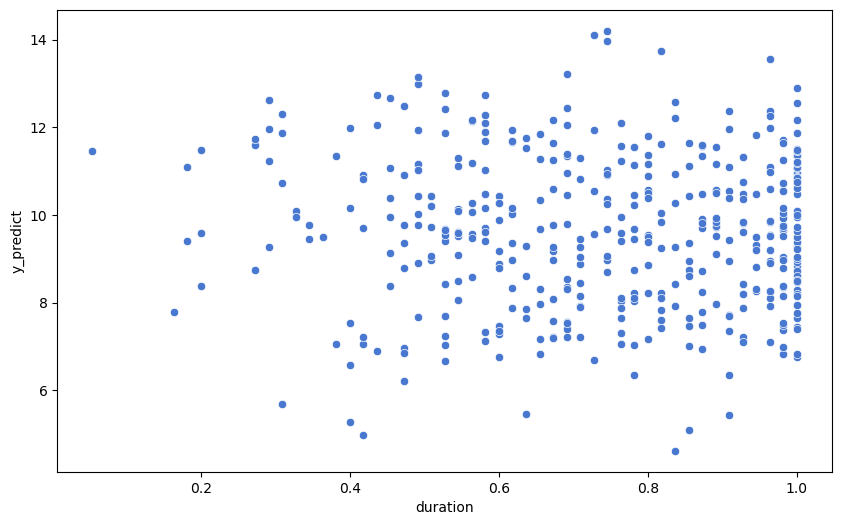

In [33]:
plt.figure(figsize = (10, 6))

sns.scatterplot(data = data,
               x = "duration",
               y = "y_predict")

> 별 의미 없어보임...

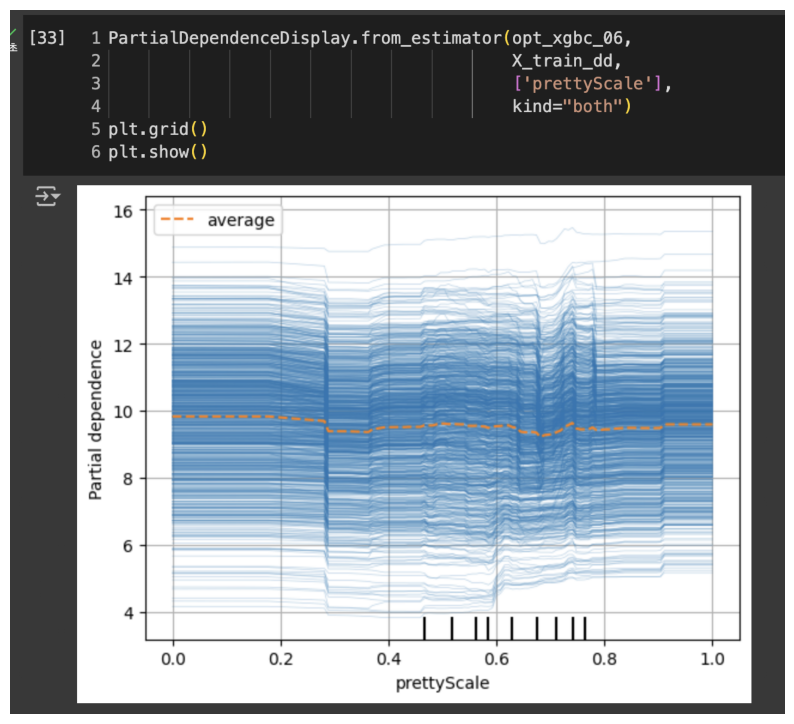

In [34]:

shap = img.imread("depencence_plot_PrettyScale.png")
plt.figure(figsize = (10, 10))
plt.imshow(shap)
plt.axis(False)
plt.show()

> 이건 어케보는건지 모르겠어요 흑흑흐ㅡ흐